Introduction:

This is our Final Project for Big Ideas in Computing and Information in which we were tasked with finding the 'best' neighborhood in Pittsburgh. To determine the best neighborhood, we looked at a multitude of different datasets, which gave us many ideas for what our metric could be. We originally started out with finding the highest rent-to-income ratio among neighborhoods, but eventually landed on the best neighborhood to own a dog in. 

The Metric: 

For our final project we found the best city to own a dog in. To do this, we used the metrics of the number of parks, amount of traffic, and number of smart trash containers a neighborhood has. We decided on these metrics as parks are a great place to walk a dog, lots of traffic is unsafe for dogs, and trash containers are needed while walking a dog. With these three metrics combined we were able to figure out what the best niehgborhood to own a dog in is. Below are links of the datasets used in our investigation.

- https://data.wprdc.org/dataset/smart-trash-containers/resource/75b83ac9-8069-4cf1-bcc3-b9e6b04487d9
- 
- 

The Best Neighborhood

In [9]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

After some data cleaning and reformatting, we are left with the three datasets below, which wil be further explored and combined in order to find the best neighborhood.

In [36]:
#import formatted datasets
containers = pd.read_csv('nfb25/trash-containers-formatted.csv')
traffic = pd.read_csv('dantewarhola/formatted_traffic.csv')


Trash Containers

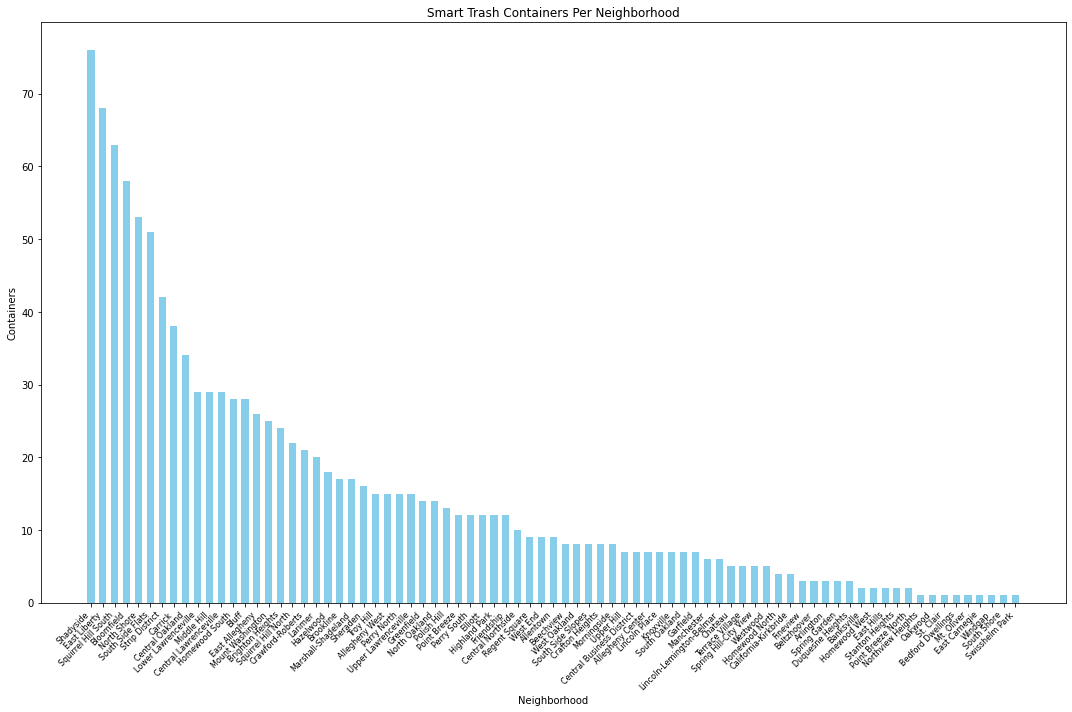

In [11]:
#display chart of trash containers
plt.figure(figsize=(15, 10))
plt.xlabel('Neighborhood')
plt.ylabel('Containers')
plt.bar(containers['neighborhood'], containers['count'], width = .6, color='skyblue')
plt.title('Smart Trash Containers Per Neighborhood')
plt.xticks(rotation=45, ha='right')
plt.xticks(fontsize=8)
plt.tight_layout()
plt.show()

The chart above shows the number of smart trash containers located in each neighborhood. For our metric, the best neighborhood is located on the left as the more containers the better. Based on the data, Shadyside has the greatest number of smart trash containers, making it the best in this metric. 

Traffic

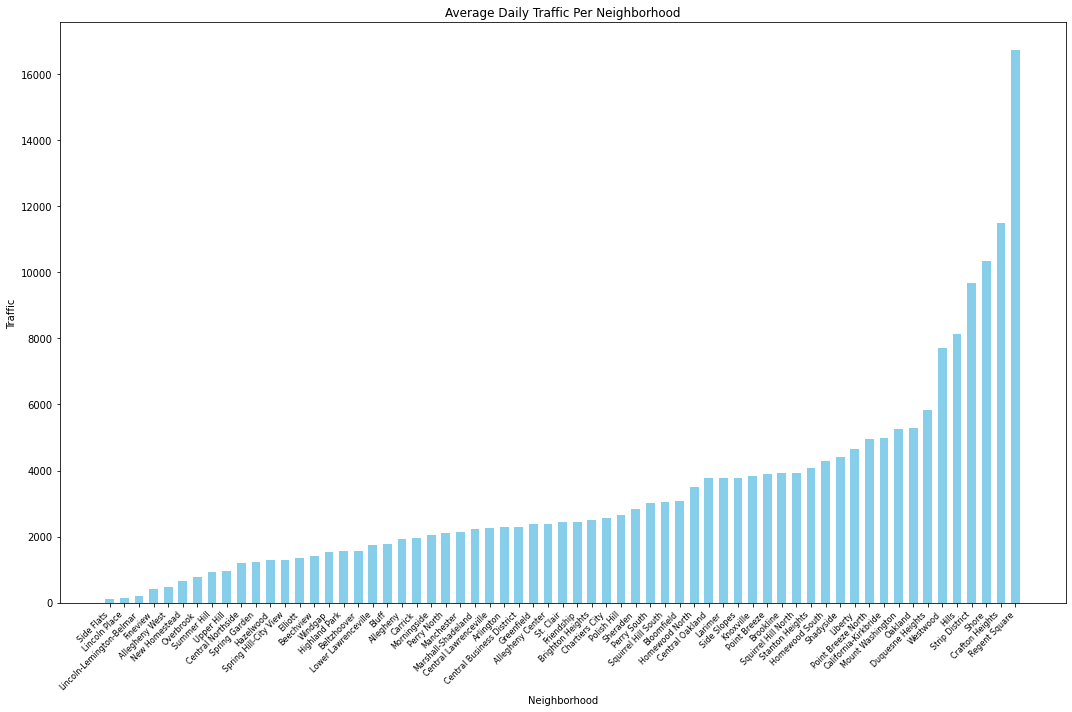

In [37]:
#display chart of trash containers
plt.figure(figsize=(15, 10))
plt.xlabel('Neighborhood')
plt.ylabel('Traffic')
plt.bar(traffic['neighborhood'], traffic['average_daily_car_traffic'], width = .6, color='skyblue')
plt.title('Average Daily Traffic Per Neighborhood')
plt.xticks(rotation=45, ha='right')
plt.xticks(fontsize=8)
plt.tight_layout()
plt.show()

The chart above shows the daily average traffic count per neighborhood. As traffic is unsafe for dogs, the best neighborhood is located on the left side of the chart. Based on this, the best neighborhood to own a dog based on traffic would be the Side Flats. 

Parks

Since each metric is very different, we need some way to incorporate all of the metrics. In order to combine the metrics to get the best neighborhood, we used the pandas function 'rank', which allowed us to compute the best neighborhood. As this process incorporates all three metrics, we needed to include weights for each of the metrics. These weights allowed us to involve all three metrics and make sure that each of them contributed to the final result. 

In [34]:
all = pd.merge(containers, traffic, on='neighborhood')
all['average_daily_car_traffic'] = all['average_daily_car_traffic'] * -1
all['rank'] = (all['count'] * 50 + all['average_daily_car_traffic']).rank(ascending=False).astype('int64')
all = all.sort_values(by='rank')
print(all)

#could give them 'rankings' (highest wins or something) so that we can put a chart for the end like it says 
#in canvas

                 neighborhood  count  average_daily_car_traffic  rank
18             Allegheny West     15                -477.000000     1
35              Lincoln Place      7                -126.000000     2
38   Lincoln-Lemington-Belmar      6                -195.000000     3
1         Squirrel Hill South     63               -3050.076923     4
4                     Carrick     38               -1969.571429     5
2                  Bloomfield     58               -3078.642857     6
43                   Fineview      3                -419.000000     7
6         Lower Lawrenceville     29               -1736.000000     8
9                       Bluff     28               -1788.333333     9
14                  Hazelwood     18               -1289.500000    10
32                 Upper Hill      7                -953.333333    11
0                   Shadyside     76               -4408.800000    12
27          Central Northside     10               -1189.000000    13
24                  

Conclusion 

Based on all the data presented, we have come to the conclusion that based on the number of smart trash containers, average daily traffic, and the number of parks, that the best neighborhood to own a dog is __________.